In [1]:
%pip install transformers timm torch pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 1.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 1.2 MB/s eta 0:00:0000:010m
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch torchvision timm pillow pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
from PIL import Image
import timm
import torch

/Users/mac/Git/ml-experiments/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mac/Git/ml-experiments/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 전처리 파이프 라인
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/train', transform=transform)
val_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/val', transform=transform)
test_dataset = datasets.ImageFolder(root='pokemon-dataset-1000/test', transform=transform)

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
import timm

# 모델 초기화
model = timm.create_model('mobilenetv3_large_100', pretrained=True, num_classes=len(train_dataset.classes))

# # 모델을 GPU로 이동 (가능한 경우)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# Apple Silicon
# GPU 설정
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 모델을 GPU 또는 CPU로 이동
model = model.to(device)

In [9]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# 훈련 및 검증
for epoch in range(10):  # 에포크 수
    model.train()
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch {epoch+1}, Training Loss: {train_loss/len(train_loader)}")

    # 검증
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct/total:.2f}%")

Epoch 1, Training Loss: 3.0838088896752134
Validation Loss: 16.899018068710962, Accuracy: 1.81%
Epoch 2, Training Loss: 0.2733338033262105
Validation Loss: 20.221097605824472, Accuracy: 1.89%
Epoch 3, Training Loss: 0.14134462675954065
Validation Loss: 23.729139508605, Accuracy: 1.89%
Epoch 4, Training Loss: 0.11936683030706469
Validation Loss: 22.93692780673504, Accuracy: 1.89%
Epoch 5, Training Loss: 0.11803421743793716
Validation Loss: 24.373369146982828, Accuracy: 1.85%
Epoch 6, Training Loss: 0.10489756157529179
Validation Loss: 24.830580387910206, Accuracy: 1.85%
Epoch 7, Training Loss: 0.08293110741386389
Validation Loss: 27.274954303105673, Accuracy: 1.81%
Epoch 8, Training Loss: 0.08356503015654645
Validation Loss: 26.501320267195503, Accuracy: 1.93%
Epoch 9, Training Loss: 0.08088570070000499
Validation Loss: 26.65502850155036, Accuracy: 1.93%
Epoch 10, Training Loss: 0.07453775998987813
Validation Loss: 28.86236251619955, Accuracy: 1.93%


In [11]:
# 테스트 데이터로 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct/total:.2f}%")

# 모델 저장
torch.save(model.state_dict(), "trained_model.pth")

Test Accuracy: 93.98%


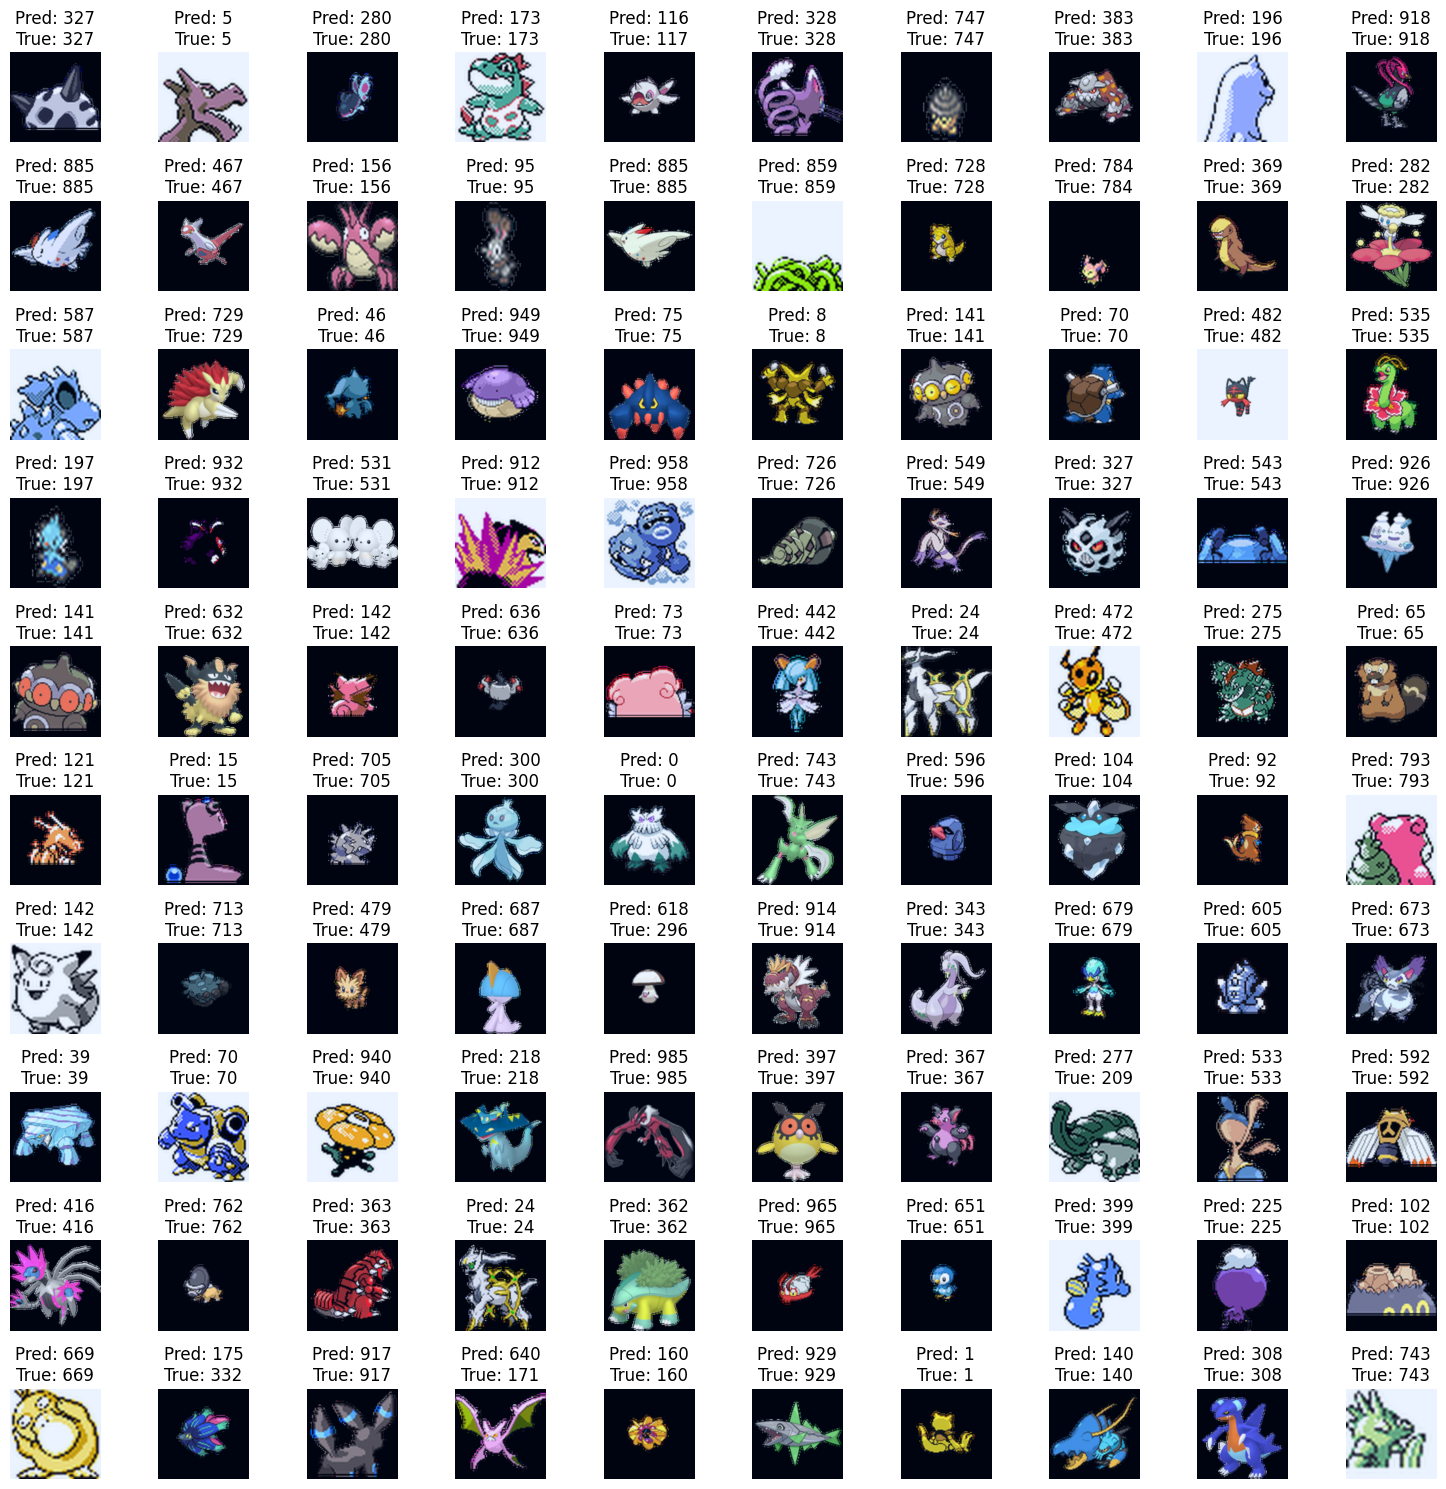

Accuracy: 95.00%


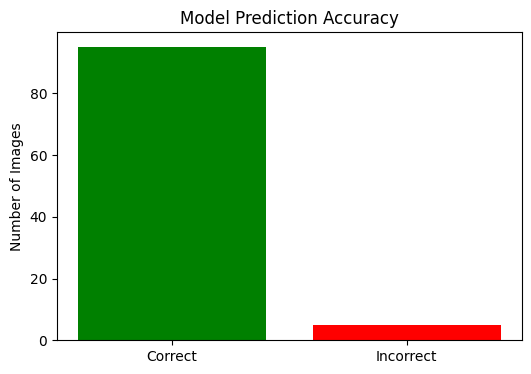

In [14]:
import random
import matplotlib.pyplot as plt
import torch

# 랜덤 샘플 100개 추출
num_samples = 100
random_indices = random.sample(range(len(test_loader.dataset)), num_samples)

# 테스트 데이터셋에서 랜덤 샘플 가져오기
images, labels = [], []
for idx in random_indices:
    img, lbl = test_loader.dataset[idx]
    images.append(img)
    labels.append(lbl)

# 이미지를 모델 입력 형식으로 변환
images_tensor = torch.stack(images).to(device)
labels_tensor = torch.tensor(labels).to(device)

# 모델 예측
model.eval()
with torch.no_grad():
    outputs = model(images_tensor)
    _, predicted = torch.max(outputs, 1)

# 결과 시각화 (10x10 그리드로 출력)
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.ravel()

# 정확도 계산용 변수
correct_count = 0

for i in range(num_samples):
    # 이미지를 [0, 1] 범위로 변환
    img = images[i].permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())
    
    # 시각화
    axes[i].imshow(img)
    pred_label = predicted[i].item()
    true_label = labels[i]
    
    # 정확도 계산
    if pred_label == true_label:
        correct_count += 1  # 맞춘 경우 카운트 증가
    
    axes[i].set_title(f"Pred: {pred_label}\nTrue: {true_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 정확도 계산 및 출력
accuracy = correct_count / num_samples * 100
print(f"Accuracy: {accuracy:.2f}%")

# 바 차트로 정확도 표현
plt.figure(figsize=(6, 4))
plt.bar(["Correct", "Incorrect"], [correct_count, num_samples - correct_count], color=["green", "red"])
plt.title("Model Prediction Accuracy")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from torchvision.datasets import DatasetFolder
from torchvision.io import read_image

# CSV 로드
metadata = pd.read_csv('metadata.csv')

# 필요 시 Dataset 클래스를 커스터마이징하여 CSV 기반으로 데이터 로드 가능

In [ ]:
def predict_with_ImageNetv4(img):
    